In [1]:
import sys
import os
os.environ['CLMM_MODELING_BACKEND'] = 'ccl' # here you may choose ccl or nc (NumCosmo)
sys.path.append('/pbs/throng/lsst/users/cpayerne/CLMM/examples/support')
try: import clmm
except:
    import notebook_install
    notebook_install.install_clmm_pipeline(upgrade=False)
    import clmm
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from astropy.table import Table

clmm.__version__
import clmm.polaraveraging as pa
import clmm.galaxycluster as gc
import clmm.modeling as modeling
from clmm import Cosmology 
sys.path.append('/pbs/throng/lsst/users/cpayerne/GitForThesis/DC2Analysis')
import statistics as stat
import resampling
import mock_data as mock
from scipy.optimize import curve_fit
import iminuit
from iminuit import Minuit

In [2]:
pwd

'/pbs/throng/lsst/users/cpayerne/GitForThesis/DC2Analysis/examples'

### Testing Modeling

In [124]:
mock_cosmo = Cosmology(H0=70.0, Omega_dm0=0.27-0.045, Omega_b0=0.045, Omega_k0=0.0)

In [128]:
cluster_z = 0.4
cluster_m = 10**16
c = 4
shapenoise = 0.0
shapenoise_scaled = shapenoise*(1 + cluster_z)

In [163]:
data = mock.generate_galaxy_catalog(cluster_m, 
                                    cluster_z, 
                                    c, 
                                    mock_cosmo, 
                                    200,
                                    
                                    zsrc = 0.6
                                    ,shapenoise = shapenoise
                                    ,ngals=100)

"""Create GalaxyCluster object"""

cl = clmm.GalaxyCluster('cluster', 0, 0, cluster_z, data)

In [164]:
cl

GalaxyCluster cluster: (ra=0.0, dec=0.0) at z=0.4
> 100 source galaxies
> With columns: ra dec e1 e2 z ztrue id

In [165]:
s = (100,100)
distance = np.zeros(s)
phi = np.zeros(s)

In [166]:
for j in range(100):
        distance[:,j] = np.sqrt((cl.galcat['ra']-cl.galcat['ra'][j])**2 +
                                (cl.galcat['dec']-cl.galcat['dec'][j])**2)
        phi = 

In [189]:
def mask(theta):
    
    mask =(distance > theta - 0.01) * (distance < theta + 0.01)
    
    print(mask[0,10])
    
    return mask

In [190]:
mask = mask(0.1)

False


In [191]:
index = np.arange(100)
pairs = []
for i in range(100):
    
    index_cut = index[mask[i,:]==True]
    
    pairs.extend([[i,ind] for ind in index_cut])


In [244]:
def gg(phi, theta):
    
    pairs = []
    
    mask =(distance > theta) * (distance < theta + 0.05)
    c = 0
    for i in range(100):
    
        index_cut = index[mask[i,:]==True]

        pairs.extend([[i,ind] for ind in index_cut])

    for p in pairs:
        
        dra = cl.galcat['ra'][p[1]] - cl.galcat['ra'][p[0]]
        ddec = cl.galcat['dec'][p[1]] - cl.galcat['dec'][p[0]]
        
        phi_to_x = np.arctan(ddec/dra)
        
        phi_to_phi = phi
        
        e1 = cl.galcat['e1'][p[1]] + 1j*cl.galcat['e2'][p[1]]
        e2 = cl.galcat['e1'][p[0]] + 1j*cl.galcat['e2'][p[0]]
        
        e1t, e2t = -(e1*np.exp(-2*phi_to_phi)), -(e2*np.exp(-2*phi_to_phi))
        
        c += (e2t.real*e1t.real + e2t.imag*e1t.imag)
    
    c = c/len(pairs)
        
    return c

In [245]:
phi = np.linspace(0.,np.pi*2,100)

In [246]:
gg_ = []
for p in phi:
    a = gg(p, 0.2)
    gg_.append(a)

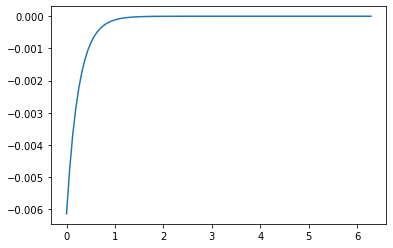

In [247]:
plt.plot(theta, np.array(gg_))

In [104]:
gg_

[None, None, None, None, None, None, None, None, None, None]